In [1]:
%pip install pandas
%pip install numpy
%pip install plotly-express
%pip install ipywidgets
%pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import plotly_express as px
import ipywidgets as widgets
import ast
from math import nan
import warnings
warnings.filterwarnings('ignore')

In [3]:
playset = pd.read_csv('/Users/hoangleduc/ironhack/ih-labs/BJ-game/blackjack_simulator.csv', sep = ',' , nrows = 250000)  # Because 5M lines total 
playset.head(10)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[[3, 4, 11]]",[18],"[['H', 'S']]",-2,0,-1.0
6,0,383,6,"[3, 3]","[6, 10, 10]",26,"[[3, 2, 10], [3, 4, 5]]","[15, 12]","[['P', 'H', 'S'], ['H', 'S']]",-1,0,2.0
7,0,374,3,"[10, 8]","[3, 10, 7]",20,"[[10, 8]]",[18],[['S']],2,0,-1.0
8,0,369,5,"[8, 10]","[5, 10, 9]",24,"[[8, 10]]",[18],[['S']],1,0,1.0
9,0,364,9,"[6, 8]","[9, 2, 5, 11]",17,"[[6, 8, 6]]",[20],"[['H', 'S']]",0,0,1.0


Action	Description
H	Hit
S	Stand
D	Double Down
P	Split
R	Surrender
I	Buy Insurance (Never used since player is following Basic Strategy)
N	No Insurance (Dont care?)
Re-splitting Aces is not allowed
Splitting Aces receives 1 extra card only, no Blackjack
Late surrender allowed
No surrender after split
Dealer hits soft 17 - A(11) + wutever - Treat it like 1 and keep hiting
Stay on hard 17

- shoe_id: Shoe identifier
- cards_remaining: Number of cards remaining in the shoe at the start of this round
- dealer_up: Inital Dealer's 1 Up (visible) card
- initial_hand: Player's initial 2 cards before making any decisions
- dealer_final: Dealer's cards at the end of the round
- dealer_final_value: Value of the Dealer's hand value at the end of the round
- player_final: Player's cards at the end of the round
- player_final_value: Player's hand(s) value(s) at the end of the round
- actions_taken: Sequence of actions taken by the player
- run_count: Hi-Lo run count at the start of the round
- true_count: Hi-Lo true count at the start of the round
- win: Amount won/lost this round (unknown ? Look below for value count | Do i care about money win?)


In [4]:
# Return df with 3 columns [['dealer_final_value','player_final_value','win']] showing rows where cases where win =1.5 or -1.5
# filtered_df = playset[(playset['win'] == 1.5) | (playset['win'] == -0.5)][['dealer_final_value', 'player_final_value', 'win']]
# filtered_df
playset['win'].value_counts()

win
-1.0    99235
 1.0    77664
 0.0    21062
 2.0    15283
-0.5    12873
 1.5    11317
-2.0    11058
 3.0      589
-3.0      533
 4.0      174
-4.0      129
 5.0       33
-5.0       22
 6.0       13
-6.0       11
 7.0        3
-7.0        1
Name: count, dtype: int64

In [5]:
playset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shoe_id             250000 non-null  int64  
 1   cards_remaining     250000 non-null  int64  
 2   dealer_up           250000 non-null  int64  
 3   initial_hand        250000 non-null  object 
 4   dealer_final        250000 non-null  object 
 5   dealer_final_value  250000 non-null  object 
 6   player_final        250000 non-null  object 
 7   player_final_value  250000 non-null  object 
 8   actions_taken       250000 non-null  object 
 9   run_count           250000 non-null  int64  
 10  true_count          250000 non-null  int64  
 11  win                 250000 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 22.9+ MB


In [6]:
type(playset['initial_hand'][1]) , type(playset['dealer_final'][1])

(str, str)

 3   initial_hand        250000 non-null  object 
 4   dealer_final        250000 non-null  object 
 5   dealer_final_value  250000 non-null  object 
 6   player_final        250000 non-null  object 
 7   player_final_value  250000 non-null  object 
 This is all string represent of list ? convert them into List

In [7]:
playset['initial_hand'] = playset['initial_hand'].apply(lambda x: ast.literal_eval(x))
playset['dealer_final'] = playset['dealer_final'].apply(lambda x: ast.literal_eval(x))
playset['player_final'] = playset['player_final'].apply(lambda x: ast.literal_eval(x))
playset['player_final_value'] = playset['player_final_value'].apply(lambda x: ast.literal_eval(x))	
playset['actions_taken'] = playset['actions_taken'].apply(lambda x: ast.literal_eval(x))	

In [8]:
playset.info()
playset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shoe_id             250000 non-null  int64  
 1   cards_remaining     250000 non-null  int64  
 2   dealer_up           250000 non-null  int64  
 3   initial_hand        250000 non-null  object 
 4   dealer_final        250000 non-null  object 
 5   dealer_final_value  250000 non-null  object 
 6   player_final        250000 non-null  object 
 7   player_final_value  250000 non-null  object 
 8   actions_taken       250000 non-null  object 
 9   run_count           250000 non-null  int64  
 10  true_count          250000 non-null  int64  
 11  win                 250000 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 22.9+ MB


,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",[BJ],[[S]],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[[H, S]]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[[S]],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[[H, H, S]]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[[H]],-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[[3, 4, 11]]",[18],"[[H, S]]",-2,0,-1.0
6,0,383,6,"[3, 3]","[6, 10, 10]",26,"[[3, 2, 10], [3, 4, 5]]","[15, 12]","[[P, H, S], [H, S]]",-1,0,2.0
7,0,374,3,"[10, 8]","[3, 10, 7]",20,"[[10, 8]]",[18],[[S]],2,0,-1.0
8,0,369,5,"[8, 10]","[5, 10, 9]",24,"[[8, 10]]",[18],[[S]],1,0,1.0
9,0,364,9,"[6, 8]","[9, 2, 5, 11]",17,"[[6, 8, 6]]",[20],"[[H, S]]",0,0,1.0


In [9]:
playset['actions_taken'] = playset['actions_taken'].apply(lambda x: [x[0] , ['P'] + x[1]]  if len(x)==2 else x).apply(lambda x: [x[0] , ['P'] + x[1], ['P'] + x[2]]  if len(x)==3 else x).apply(lambda x: [x[0] , ['P'] + x[1], ['P'] + x[2], ['P'] + x[3]]  if len(x)==4 else x).apply(lambda x: [x[0] , ['P'] + x[1], ['P'] + x[2], ['P'] + x[3] , ['P'] + x[4]]  if len(x)==5 else x)

In [10]:
playset.iloc[6]

shoe_id                                     0
cards_remaining                           383
dealer_up                                   6
initial_hand                           [3, 3]
dealer_final                      [6, 10, 10]
dealer_final_value                         26
player_final          [[3, 2, 10], [3, 4, 5]]
player_final_value                   [15, 12]
actions_taken          [[P, H, S], [P, H, S]]
run_count                                  -1
true_count                                  0
win                                       2.0
Name: 6, dtype: object

6	0	383	6	[3, 3]	[6, 10, 10]	26	[[3, 2, 10], [3, 4, 5]]	[15, 12]	[[P, H, S], [H, S]]	-1	0	2. 
2 hands -> devided it into 2 hands
--> use .explode()


In [11]:
# Explode the columns
df_exploded = playset.explode(['player_final', 'player_final_value', 'actions_taken'])

# Reset the index for a cleaner DataFrame
df_exploded.reset_index(drop=True, inplace=True)
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shoe_id             257004 non-null  int64  
 1   cards_remaining     257004 non-null  int64  
 2   dealer_up           257004 non-null  int64  
 3   initial_hand        257004 non-null  object 
 4   dealer_final        257004 non-null  object 
 5   dealer_final_value  257004 non-null  object 
 6   player_final        257004 non-null  object 
 7   player_final_value  257004 non-null  object 
 8   actions_taken       257004 non-null  object 
 9   run_count           257004 non-null  int64  
 10  true_count          257004 non-null  int64  
 11  win                 257004 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 23.5+ MB


Added 257004 - 250000 = 7004 entries 

In [12]:
df_exploded['shoe_id'].unique()

array([   0,    1,    2, ..., 4111, 4112, 4113])

In [13]:
df_exploded['true_count'].unique()

array([  0,  -1,  -2,  -3,   1,  -4,  -5,   2,   3,   5,   4,   7,   6,
         8,   9,  11,  10,  12,  -6,  -7,  -8,  -9, -10, -11,  13, -12,
       -13, -14,  14,  15,  16, -15, -17, -16, -18, -19])

In [14]:
# df_exploded['player_final_value'].dtype()
df_exploded['player_final_value'].unique()

array(['BJ', 21, 13, 18, 26, 15, 12, 20, 17, 14, 19, 16, 23, 24, 25, 22,
       9, 10, 5, 11, 7, 8, 4, 6], dtype=object)

In [15]:
df_exploded['dealer_final_value'].unique()

array(['24', '18', '22', '20', '19', '26', '17', '23', 'BJ', '21', '25'],
      dtype=object)

In [16]:
df_exploded[df_exploded['player_final_value'].isin(['BJ', 21])].head(10)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[10, 11]",BJ,[S],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",21,"[H, S]",-2,0,1.0
11,0,357,10,"[11, 10]","[10, 10]",20,"[11, 10]",BJ,[S],3,0,1.5
13,0,348,10,"[4, 10]","[10, 2, 10]",22,"[4, 10, 7]",21,"[H, S]",-4,0,1.0
14,0,342,2,"[4, 7]","[2, 6, 5, 2, 3]",18,"[4, 7, 10]",21,[D],-5,0,2.0
20,0,309,2,"[10, 11]","[2, 7, 4, 6]",19,"[10, 11]",BJ,[S],-1,0,1.5
33,0,240,2,"[11, 10]","[2, 10, 10]",22,"[11, 10]",BJ,[S],-3,0,1.5
40,0,213,9,"[9, 9]","[9, 3, 4, 4]",20,"[9, 5, 7]",21,"[P, H, S]",-8,-1,-1.0
69,1,394,10,"[11, 11]","[10, 2, 7]",19,"[11, 10]",21,[P],0,0,0.0
86,1,294,11,"[11, 10]","[11, 9]",20,"[11, 10]",BJ,"[N, S]",5,0,1.5


 - A Blackjack is a specific hand consisting of an Ace (valued as 11) and a 10-value card (10, Jack, Queen, or King) as the initial two cards
 - hand value of 21 can be achieved by other combinations of cards, not just the initial two cards

In [17]:
# Define custom sorting key
def custom_sort(value):
    if value == 'BJ':
        return (0, value)
    else:
        return (1, -int(value))
# Apply custom sorting key
sorted_values = sorted(df_exploded['player_final_value'].unique(), key=custom_sort)
df_exploded['player_final_value'] = pd.Categorical(df_exploded['player_final_value'], categories=sorted_values, ordered=True)


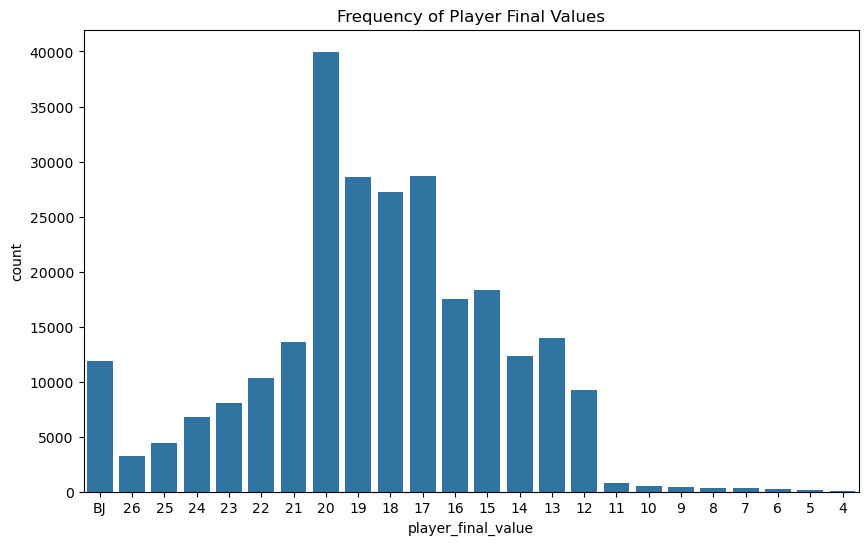

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar Plot for player_final_value
plt.figure(figsize=(10, 6))
sns.countplot(data=df_exploded, x='player_final_value')
plt.title('Frequency of Player Final Values')
plt.show()

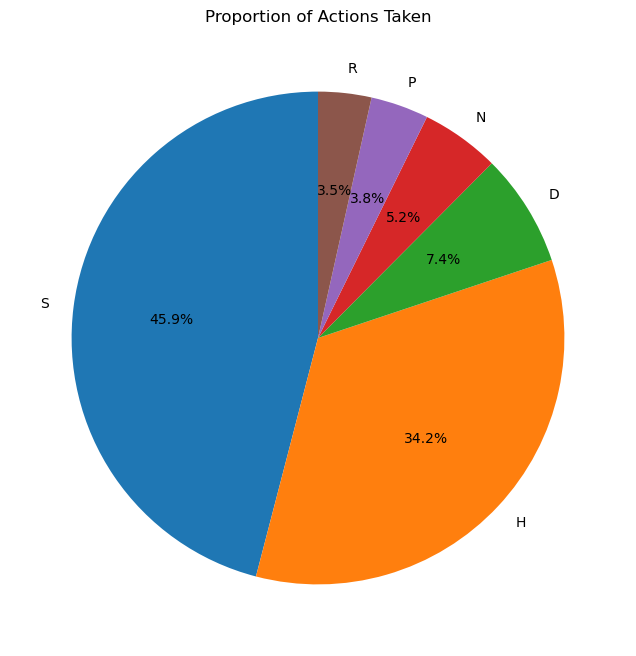

In [19]:
# Pie Chart for actions_taken
actions_flat = [item for sublist in df_exploded['actions_taken'] for item in sublist]
actions_series = pd.Series(actions_flat)
actions_counts = actions_series.value_counts()

plt.figure(figsize=(8, 8))
actions_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Actions Taken')
plt.ylabel('')
plt.show()


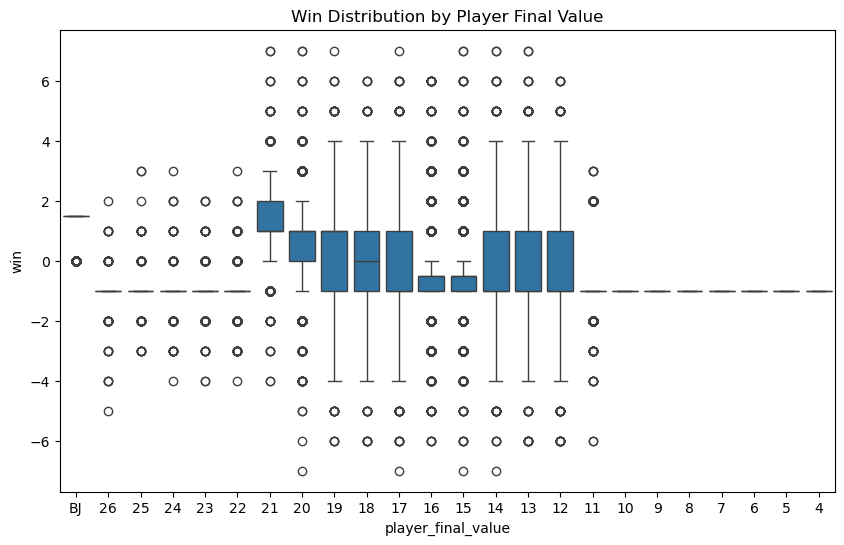

In [20]:
# Box Plot for win by player_final_value BJ first, number desc
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_exploded, x='player_final_value', y='win')
plt.title('Win Distribution by Player Final Value')
plt.show()

In [21]:
def cards_splitter(data,cards,text):
    stopsign = cards.apply(lambda x: len(x))
    for i in range(1,max(stopsign)):
        data[f'{text}{i}'] = cards.apply(lambda x: nan if len(x)<i else x[i-1])

In [22]:
playlist_v2 = df_exploded.copy()

cards_splitter(playlist_v2,df_exploded['player_final'],'player_card_')
cards_splitter(playlist_v2,df_exploded['dealer_final'],'dealer_card_')
cards_splitter(playlist_v2,df_exploded['actions_taken'],'action_taken_')

In [23]:
playlist_v2.head(10)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,...,dealer_card_4,dealer_card_5,dealer_card_6,dealer_card_7,action_taken_1,action_taken_2,action_taken_3,action_taken_4,action_taken_5,action_taken_6
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[10, 11]",BJ,[S],1,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",21,"[H, S]",-2,...,NaN,NaN,NaN,NaN,H,S,NaN,NaN,NaN,NaN
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[3, 10]",13,[S],-2,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",18,"[H, H, S]",-1,...,NaN,NaN,NaN,NaN,H,H,S,NaN,NaN,NaN
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[6, 10, 10]",26,[H],-1,...,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[3, 4, 11]",18,"[H, S]",-2,...,NaN,NaN,NaN,NaN,H,S,NaN,NaN,NaN,NaN
6,0,383,6,"[3, 3]","[6, 10, 10]",26,"[3, 2, 10]",15,"[P, H, S]",-1,...,NaN,NaN,NaN,NaN,P,H,S,NaN,NaN,NaN
7,0,383,6,"[3, 3]","[6, 10, 10]",26,"[3, 4, 5]",12,"[P, H, S]",-1,...,NaN,NaN,NaN,NaN,P,H,S,NaN,NaN,NaN
8,0,374,3,"[10, 8]","[3, 10, 7]",20,"[10, 8]",18,[S],2,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
9,0,369,5,"[8, 10]","[5, 10, 9]",24,"[8, 10]",18,[S],1,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN


In [24]:
playlist_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   shoe_id             257004 non-null  int64   
 1   cards_remaining     257004 non-null  int64   
 2   dealer_up           257004 non-null  int64   
 3   initial_hand        257004 non-null  object  
 4   dealer_final        257004 non-null  object  
 5   dealer_final_value  257004 non-null  object  
 6   player_final        257004 non-null  object  
 7   player_final_value  257004 non-null  category
 8   actions_taken       257004 non-null  object  
 9   run_count           257004 non-null  int64   
 10  true_count          257004 non-null  int64   
 11  win                 257004 non-null  float64 
 12  player_card_1       257004 non-null  int64   
 13  player_card_2       257004 non-null  int64   
 14  player_card_3       115671 non-null  float64 
 15  player_card_4    

In [25]:
# player_final_value  257004 non-null  category convert to dealer_final_value  257004 non-null  object 
playlist_v2['player_final_value'] = playlist_v2['player_final_value'].astype('object')

In [26]:
# replace 'BJ' to 21 to stay in int types only. 
# To differ wether the hand was blackjack or just a sum of 21 we will add 2 new columns of 'is_blackjack_player' and 'is_blackjack_dealer'.
playlist_v2['is_blackjack_dealer'] = playlist_v2['dealer_final_value'].where(playlist_v2['dealer_final_value'] == 'BJ').fillna(0).replace('BJ',1)
playlist_v2['is_blackjack_player'] = playlist_v2['player_final_value'].where(playlist_v2['player_final_value'] == 'BJ').fillna(0).replace('BJ',1)
playlist_v2['dealer_final_value'] = playlist_v2['dealer_final_value'].replace('BJ',21)
playlist_v2['player_final_value'] = playlist_v2['player_final_value'].replace('BJ',21)
playlist_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   shoe_id              257004 non-null  int64  
 1   cards_remaining      257004 non-null  int64  
 2   dealer_up            257004 non-null  int64  
 3   initial_hand         257004 non-null  object 
 4   dealer_final         257004 non-null  object 
 5   dealer_final_value   257004 non-null  object 
 6   player_final         257004 non-null  object 
 7   player_final_value   257004 non-null  int64  
 8   actions_taken        257004 non-null  object 
 9   run_count            257004 non-null  int64  
 10  true_count           257004 non-null  int64  
 11  win                  257004 non-null  float64
 12  player_card_1        257004 non-null  int64  
 13  player_card_2        257004 non-null  int64  
 14  player_card_3        115671 non-null  float64
 15  player_card_4    

In [27]:
# Convert dealer_final_value to int
playlist_v2['dealer_final_value'] = playlist_v2['dealer_final_value'].astype('int')
type(playlist_v2['player_final_value'][0]) , type(playlist_v2['dealer_final_value'][0])



(numpy.int64, numpy.int64)

In [28]:
playlist_v2['is_blackjack_dealer'].value_counts()

is_blackjack_dealer
0    245176
1     11828
Name: count, dtype: int64

In [29]:
print(playlist_v2['win'].value_counts())
playlist_v2['win'].sum()

win
-1.0    99809
 1.0    78101
 0.0    21947
 2.0    16908
-0.5    12873
-2.0    12511
 1.5    11317
 3.0     1290
-3.0     1174
 4.0      439
-4.0      344
 5.0      110
-5.0       76
 6.0       47
-6.0       42
 7.0       12
-7.0        4
Name: count, dtype: int64


-1391.0

In [30]:
#  Convert the win column to a pure Win/Loss/Push case indidcated by 1/-1/0 respectively based on condition of player_final_value, dealer_final_value and win
# 1 if player_final_value > dealer_final_value and player_final_value <= 21
# -1 if player_final_value < dealer_final_value and dealer_final_value <= 21
# 0 if player_final_value = dealer_final_value and player_final_value <= 21
# use playlist_v2['dealer_final_value'] and playlist_v2['player_final_value'] to compare with win

conditions = [
    (playlist_v2['dealer_final_value'] < playlist_v2['player_final_value']) & (playlist_v2['player_final_value'] <= 21),
    playlist_v2['dealer_final_value'] > 21,
    playlist_v2['dealer_final_value'] == playlist_v2['player_final_value'],
    (playlist_v2['dealer_final_value'] > playlist_v2['player_final_value']) & (playlist_v2['dealer_final_value'] <= 21),
    playlist_v2['player_final_value'] > 21
]

choices = [1, 1, 0, -1, -1]
playlist_v2.loc[:, 'win'] = np.select(conditions, choices, default=0)

# Ensure 'win' column is of type int64
playlist_v2['win'] = playlist_v2['win'].astype('int64')
playlist_v2['win'].value_counts()

win
 1    118570
-1    116307
 0     22127
Name: count, dtype: int64

## Analysis


In [31]:
playlist_v2['win'].sum()

2263

win
 1    46.135469
-1    45.254938
 0     8.609594
Name: proportion, dtype: float64


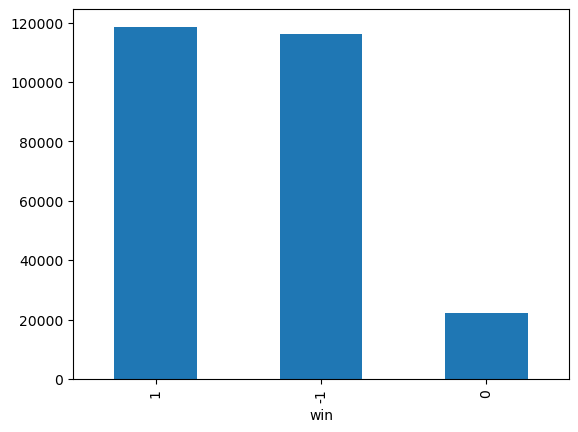

In [32]:
# Calculate percentage of each value in playlsit_v2 win column
percentage_distribution = playlist_v2['win'].value_counts(normalize=True) * 100

# Display the result
print(percentage_distribution)
# Display distribution of playlist_v2 win column
import matplotlib.pyplot as plt
playlist_v2_plot = playlist_v2["win"].value_counts()
playlist_v2_plot.plot(kind="bar")
plt.show()
# Imbalance data for 0 

In [33]:
playlist_v2['dealer_up'].value_counts()
# 10 -> x4 since 10, J, Q, K are all 10


dealer_up
10    77355
6     20483
5     20441
2     20238
4     20186
3     20024
7     19963
8     19786
9     19400
11    19128
Name: count, dtype: int64

In [34]:
# Calculate ratio of blackjack to all hands for players and dealers respectively
blackjack_ratio_player = playlist_v2['is_blackjack_player'].sum() / playlist_v2['is_blackjack_player'].count()
blackjack_ratio_dealer = playlist_v2['is_blackjack_dealer'].sum() / playlist_v2['is_blackjack_dealer'].count()
print(f'Blackjack ratio for players: {blackjack_ratio_player:.5f}')
print(f'Blackjack ratio for dealers: {blackjack_ratio_dealer:.5f}')
# Around the same ratio ?

Blackjack ratio for players: 0.04625
Blackjack ratio for dealers: 0.04602


Modelling   

In [35]:
playlist_v2.columns
# Columns not important? shoe_id
# Repeating columns : player_final, dealer_final, player_final_value, actions_taken -> Already exploded -> Drop
# Columns to drop : initial_hand, player_final, dealer_final, player_final_value, actions_taken, shoe_id
# 5/8 decks casino table 
playlist_v2.drop(columns=['initial_hand', 'player_final', 'dealer_final', 'player_final_value', 'actions_taken', 'shoe_id','cards_remaining','dealer_up','dealer_final_value'], inplace=True)


In [36]:
# Display all column of playlist_v2.head
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
playlist_v2.head()

,run_count,true_count,win,player_card_1,player_card_2,player_card_3,player_card_4,player_card_5,player_card_6,player_card_7,dealer_card_1,dealer_card_2,dealer_card_3,dealer_card_4,dealer_card_5,dealer_card_6,dealer_card_7,action_taken_1,action_taken_2,action_taken_3,action_taken_4,action_taken_5,action_taken_6,is_blackjack_dealer,is_blackjack_player
0,1,0,1,10,11,NaN,NaN,NaN,NaN,NaN,10,4,10.0,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,0,1
1,-2,0,1,5,5,11.0,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,H,S,NaN,NaN,NaN,NaN,0,0
2,-2,0,1,3,10,NaN,NaN,NaN,NaN,NaN,6,6,10.0,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,0,0
3,-1,0,0,5,9,11.0,3.0,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,H,H,S,NaN,NaN,NaN,0,0
4,-1,0,-1,6,10,10.0,NaN,NaN,NaN,NaN,8,2,10.0,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,0,0


In [37]:

playlist_v2.info()
# playlist_v2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   run_count            257004 non-null  int64  
 1   true_count           257004 non-null  int64  
 2   win                  257004 non-null  int64  
 3   player_card_1        257004 non-null  int64  
 4   player_card_2        257004 non-null  int64  
 5   player_card_3        115671 non-null  float64
 6   player_card_4        31174 non-null   float64
 7   player_card_5        5733 non-null    float64
 8   player_card_6        699 non-null     float64
 9   player_card_7        60 non-null      float64
 10  dealer_card_1        257004 non-null  int64  
 11  dealer_card_2        257004 non-null  int64  
 12  dealer_card_3        171692 non-null  float64
 13  dealer_card_4        57400 non-null   float64
 14  dealer_card_5        10908 non-null   float64
 15  dealer_card_6    

In [43]:
# ki square test for correlation map 
# Nan values and change object -> int | Card are categorical -> fill nan with -1
# Actions taken object -> int 
playlist_v2['action_taken_1'].value_counts()
# S -> 1, H -> 2, D -> 3, P -> 4, R -> 5 N-> 6
# or onehot encoding in place ['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']] 
# => Too many features 6*6 = 36 for this alone


# columns_to_encode = ['action_taken_1', 'action_taken_2', 'action_taken_3', 'action_taken_4', 'action_taken_5', 'action_taken_6']
# df_encoded = pd.get_dummies(playlist_v2, columns=columns_to_encode)

# # Display the encoded DataFrame
# print(df_encoded.head())


action_taken_1
S    104799
H     79335
D     24463
N     19067
P     13144
R     10306
Name: count, dtype: int64

In [44]:
playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']] = playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']].replace({ 'S' : 1, 'H' : 2 , 'D' : 3 , 'P' : 4 , 'R' : 5 , 'N' : 6})
playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']] = playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']].fillna(-1)
playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']] = playlist_v2[['action_taken_1','action_taken_2','action_taken_3','action_taken_4','action_taken_5','action_taken_6']].astype('int')
playlist_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   run_count            257004 non-null  int64  
 1   true_count           257004 non-null  int64  
 2   win                  257004 non-null  int64  
 3   player_card_1        257004 non-null  int64  
 4   player_card_2        257004 non-null  int64  
 5   player_card_3        115671 non-null  float64
 6   player_card_4        31174 non-null   float64
 7   player_card_5        5733 non-null    float64
 8   player_card_6        699 non-null     float64
 9   player_card_7        60 non-null      float64
 10  dealer_card_1        257004 non-null  int64  
 11  dealer_card_2        257004 non-null  int64  
 12  dealer_card_3        171692 non-null  float64
 13  dealer_card_4        57400 non-null   float64
 14  dealer_card_5        10908 non-null   float64
 15  dealer_card_6    

In [49]:
prepdata = playlist_v2.fillna(-1).astype('int')
prepdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257004 entries, 0 to 257003
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   run_count            257004 non-null  int64
 1   true_count           257004 non-null  int64
 2   win                  257004 non-null  int64
 3   player_card_1        257004 non-null  int64
 4   player_card_2        257004 non-null  int64
 5   player_card_3        257004 non-null  int64
 6   player_card_4        257004 non-null  int64
 7   player_card_5        257004 non-null  int64
 8   player_card_6        257004 non-null  int64
 9   player_card_7        257004 non-null  int64
 10  dealer_card_1        257004 non-null  int64
 11  dealer_card_2        257004 non-null  int64
 12  dealer_card_3        257004 non-null  int64
 13  dealer_card_4        257004 non-null  int64
 14  dealer_card_5        257004 non-null  int64
 15  dealer_card_6        257004 non-null  int64
 16  de

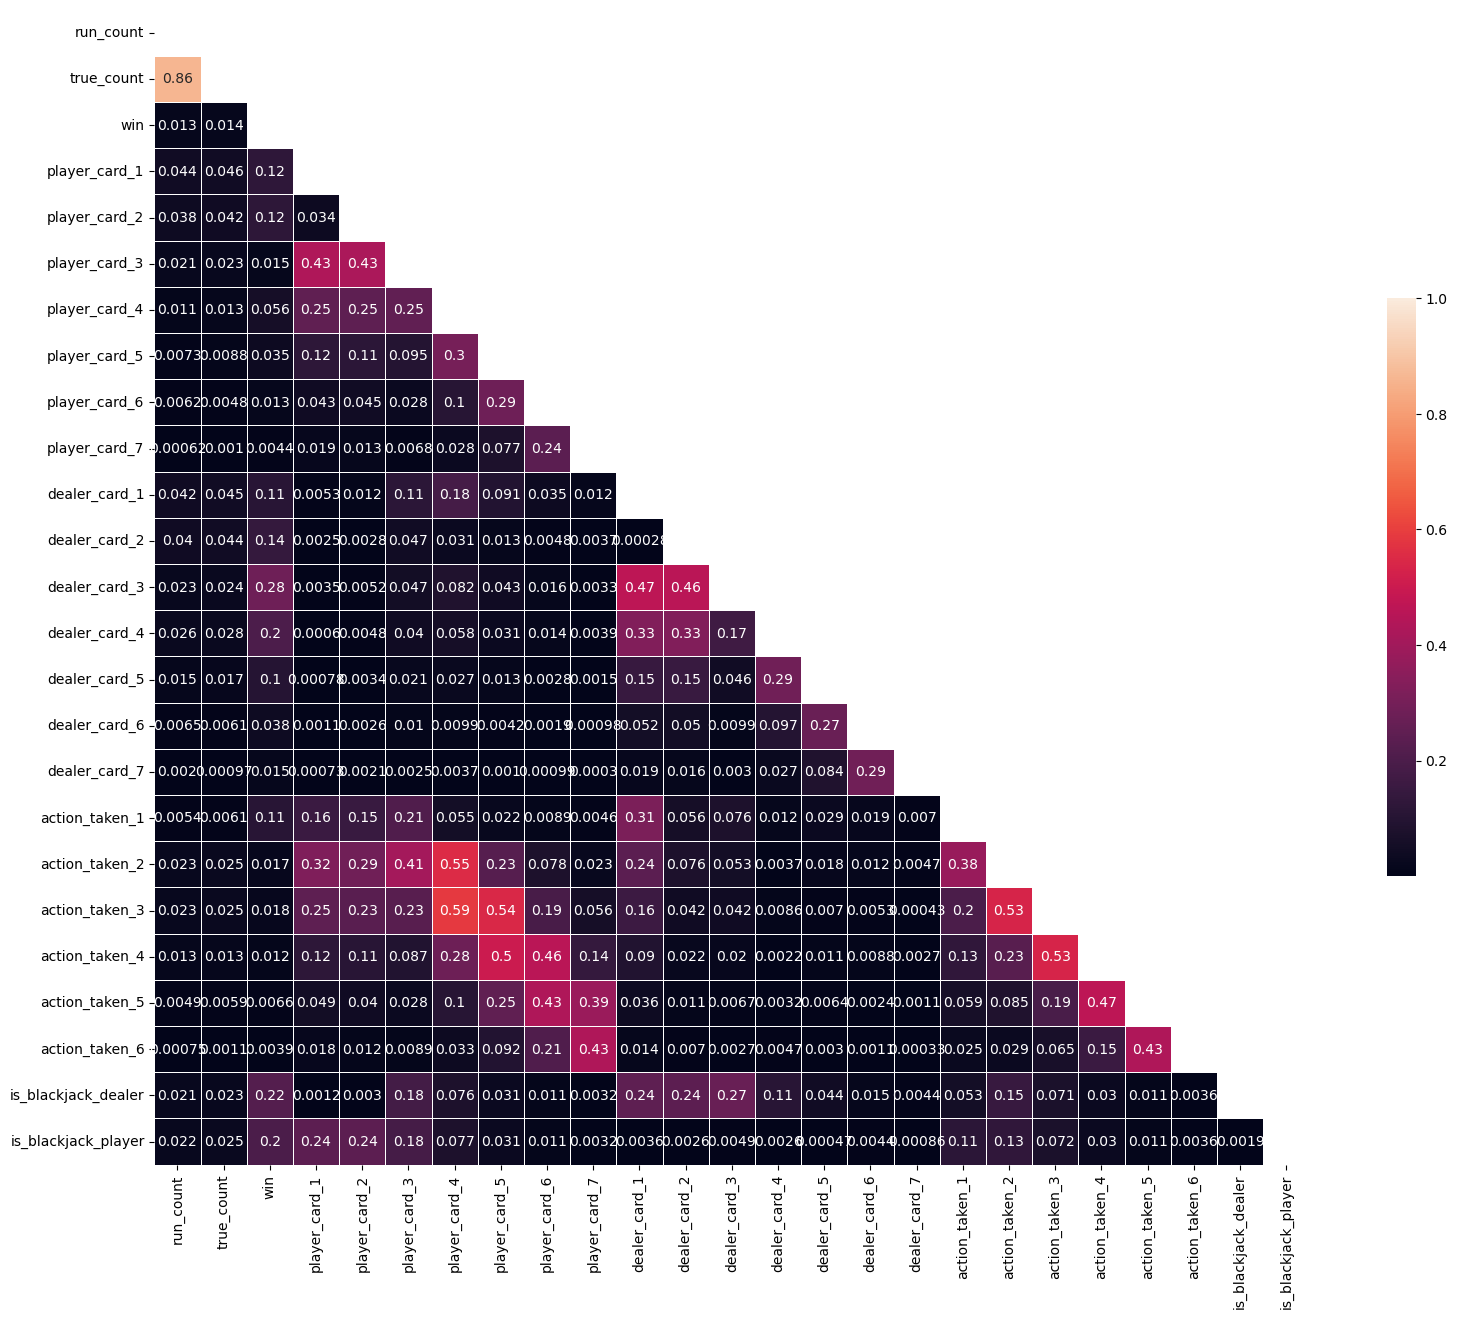

In [48]:

import seaborn as sns
import matplotlib.pyplot as plt
corr=np.abs(prepdata.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Modelling  - KNN 

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier

In [52]:
def calculate_metrics(k, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    conf_matrix = pd.DataFrame({'True': y_test, 'Predicted': y_pred}).groupby(['True', 'Predicted']).size()
    
    return accuracy, precision, conf_matrix

def evaluate_knn(prepdata, k_values):
    x = prepdata.drop('win', axis=1)
    y = prepdata['win']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    acclist = []
    perlist = []
    conflist = {}
    
    for k in k_values:
        accuracy, precision, conf_matrix = calculate_metrics(k, x_train, y_train, x_test, y_test)
        acclist.append(accuracy)
        perlist.append(precision)
        conflist[k] = conf_matrix
    
    totalscore = pd.DataFrame({'Accuracy': acclist, 'Precision': perlist}, index=k_values)
    return totalscore, conflist

# Define k values
k_values = list(range(1, 26, 2))

# Evaluate the k-NN classifier
totalscore, conflist = evaluate_knn(prepdata, k_values)

# Display the results
totalscore

,Accuracy,Precision
1,0.820587,0.819749
3,0.828408,0.820068
5,0.833369,0.825333
7,0.835392,0.826344
9,0.834458,0.824555
11,0.833797,0.824183
13,0.832182,0.822480
15,0.830529,0.821320
17,0.830198,0.821619
19,0.828622,0.820253


In [54]:
# Function to fetch and return the confusion matrix for a given k value
def knn_confusion_matrix(conflist, k):
    conf_matrix = conflist.get(k)
    if conf_matrix is not None:
        return conf_matrix
    else:
        return "Confusion matrix for k={} not found.".format(k)

# Function to create an interactive widget
def knn_confusion_matrix_widget(conflist):
    @widgets.interact
    def display_conf_matrix(k=widgets.IntSlider(value=1, min=1, max=25, step=2, description='K Value')):
        conf_matrix = knn_confusion_matrix(conflist, k)
        if isinstance(conf_matrix, str):
            print(conf_matrix)
        else:
            display(conf_matrix)
    
    return display_conf_matrix

# Assume `conflist` has been defined in the previous code segment
knn_confusion_matrix_widget(conflist)

interactive(children=(IntSlider(value=1, description='K Value', max=25, min=1, step=2), Output()), _dom_classe…

<function __main__.knn_confusion_matrix_widget.<locals>.display_conf_matrix(k=IntSlider(value=1, description='K Value', max=25, min=1, step=2))>

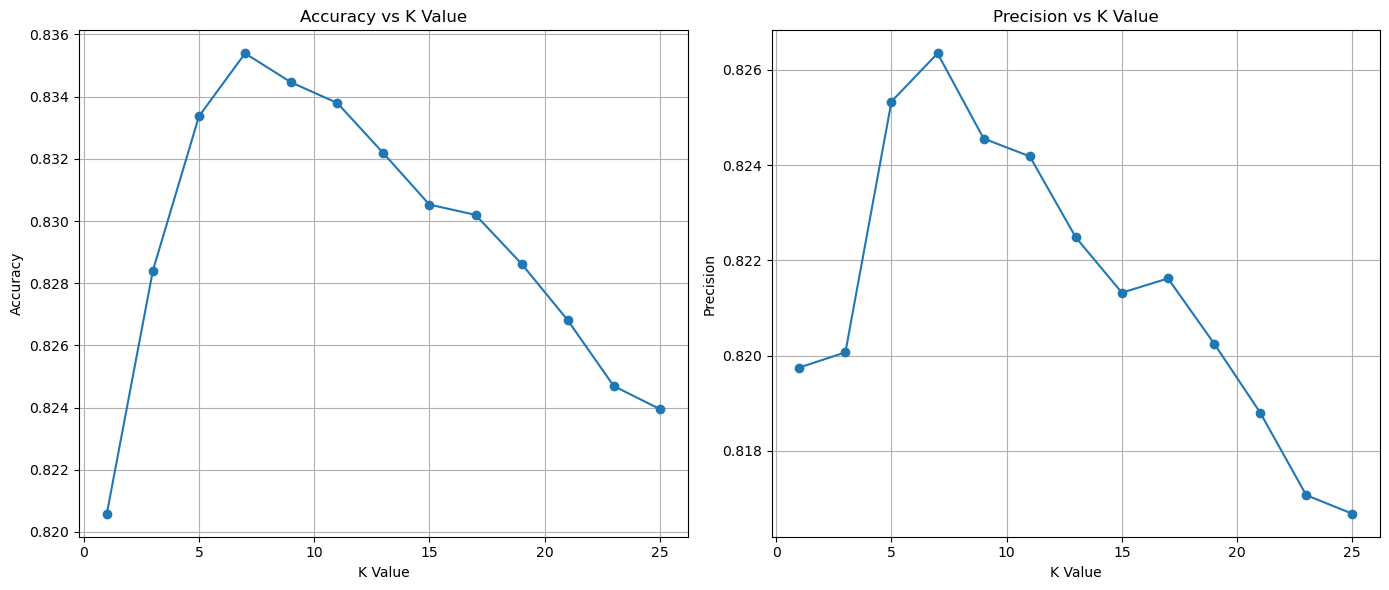

In [55]:
# Plotting the graphs
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(totalscore.index, totalscore['Accuracy'], marker='o', linestyle='-')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot precision
plt.subplot(1, 2, 2)
plt.plot(totalscore.index, totalscore['Precision'], marker='o', linestyle='-')
plt.title('Precision vs K Value')
plt.xlabel('K Value')
plt.ylabel('Precision')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## Random forest


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Function to split the data
def split_data(data, target_column, test_size=0.2, random_state=42):
    x = data.drop(target_column, axis=1)
    y = data[target_column]
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

# Function to train the RandomForest model
def train_rf_model(x_train, y_train):
    rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf_model.fit(x_train, y_train)
    return rf_model

# Function to plot feature importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances, align='center')
    plt.xticks(range(len(importances)), feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

# Load and split the data
x_train, x_test, y_train, y_test = split_data(prepdata, 'win')

# Train the model
rf_model = train_rf_model(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
# Plot the feature importances


              precision    recall  f1-score   support

          -1      0.925     0.943     0.934     23171
           0      0.863     0.536     0.661      4483
           1      0.908     0.956     0.932     23747

    accuracy                          0.914     51401
   macro avg      0.899     0.812     0.842     51401
weighted avg      0.912     0.914     0.909     51401



	•	High Performance for Classes -1 and 1: The model performs very well for classes -1 and 1, with high precision, recall, and F1-scores.
	•	Lower Performance for Class 0: The model struggles with class 0, indicating it might benefit from techniques to address class imbalance or further tuning.
	•	Overall High Accuracy: The high accuracy indicates that the model performs well overall, but this metric can be misleading in the presence of class imbalance, hence the importance of considering precision, recall, and F1-scores.
    =>>
    Address Class Imbalance: Consider using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights to improve performance on the minority class (class 0).

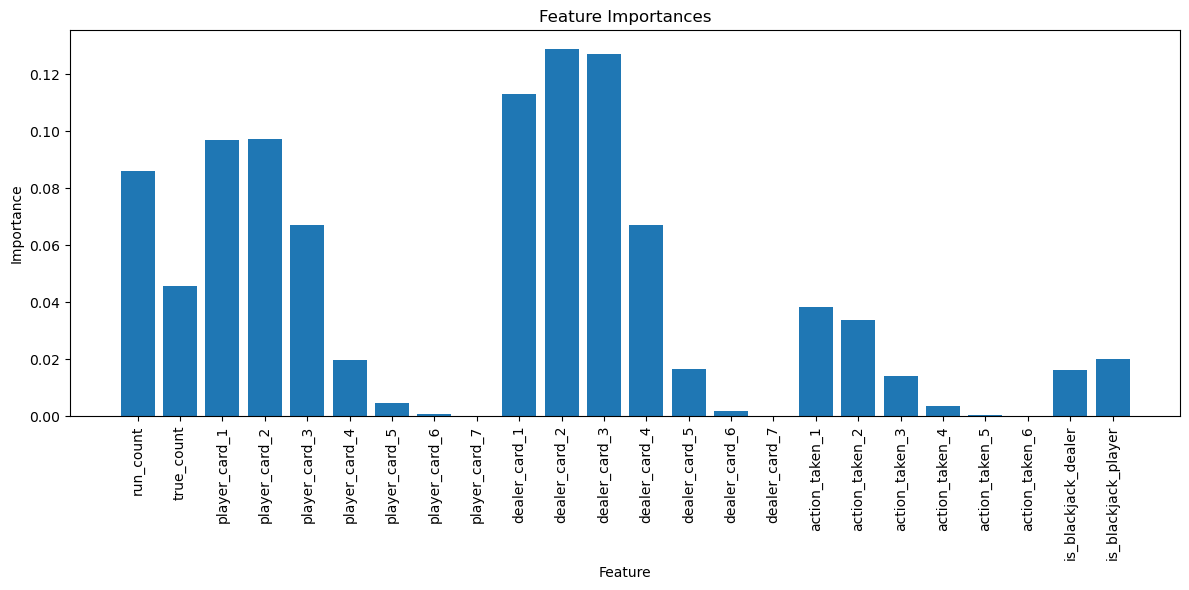

In [62]:
# Plot the feature importances
plot_feature_importances(rf_model, x_train.columns)